In [211]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as px

In [212]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [213]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#Missing values

In [214]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**No missings

#Checking for duplicates

In [215]:
print("before Dropping dups",df.shape)
df.drop_duplicates(keep="first",inplace=True)
print("after Dropping dups",df.shape)

before Dropping dups (200, 5)
after Dropping dups (200, 5)


**No duplicates founds**

#Handling categorical columns

In [216]:
df.select_dtypes(exclude=["int","float"]).columns

Index(['Genre'], dtype='object')

In [217]:
df['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

In [218]:
df['Genre']=df['Genre'].map({"Male":1,"Female":2})

#Feature scaling

In [219]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [220]:
df[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]=scaler.fit_transform(df[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']])

In [221]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,2,-1.352802,-1.700830,-1.715913
3,4,2,-1.137502,-1.700830,1.040418
4,5,2,-0.563369,-1.662660,-0.395980


#Heirarchial CLustering

In [222]:
datasubset=df.loc[:,['Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [223]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

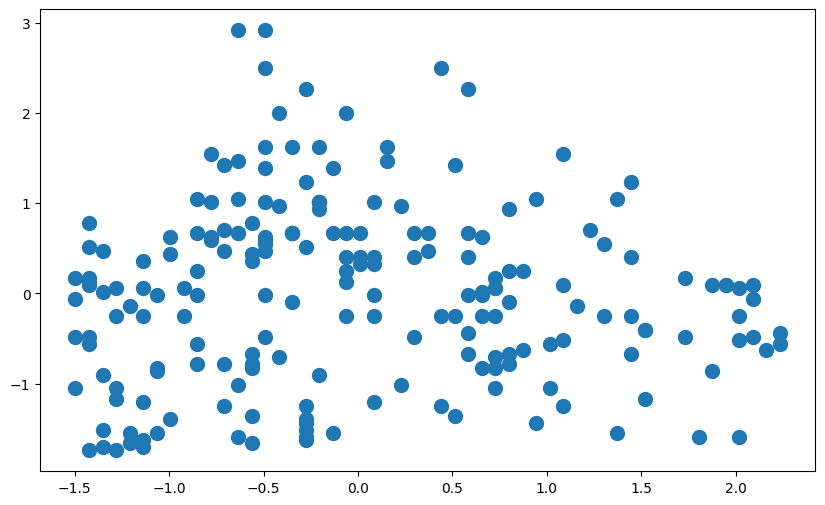

In [224]:
plt.figure(figsize=(10,6))
plt.scatter(datasubset['Age'],datasubset['Annual Income (k$)'],s=100)

###Creating dendogram

In [225]:
import scipy.cluster.hierarchy as sch

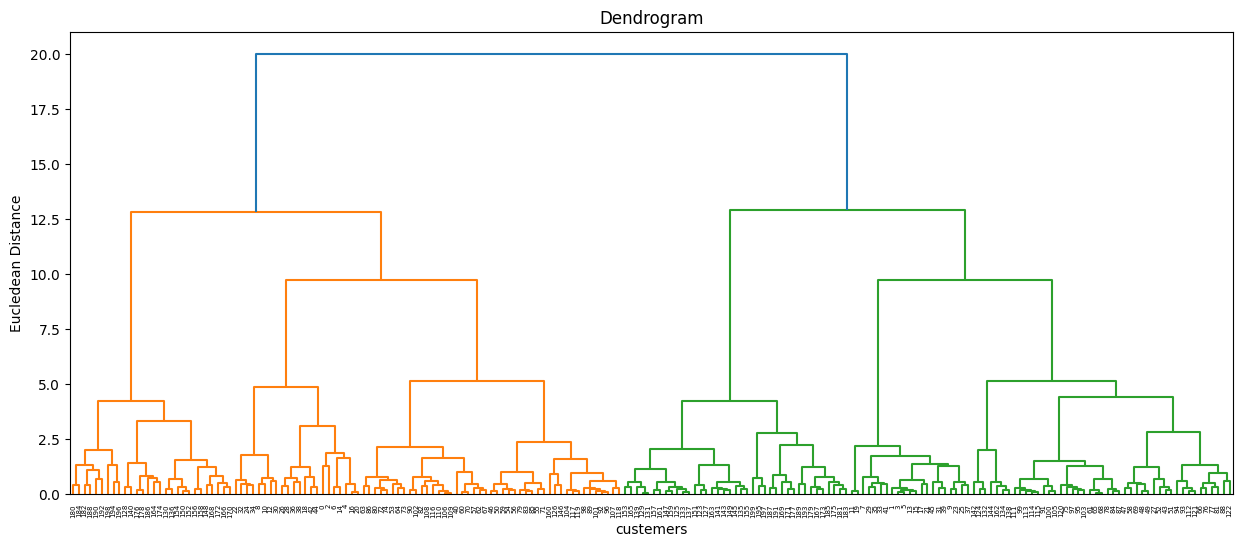

In [226]:
plt.figure(figsize=(15,6))
dendogram=sch.dendrogram(sch.linkage(datasubset,method="ward"))
plt.title("Dendrogram")
plt.xlabel("custemers")
plt.ylabel("Eucledean Distance")
plt.show()

In [227]:
from sklearn.cluster import AgglomerativeClustering
cluter=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
cluter.fit(datasubset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [228]:
cl=cluter.fit_predict(datasubset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


#Evaluation

In [229]:
from sklearn.metrics import silhouette_score

In [230]:
silhouette_score(datasubset,cl)

0.3614512741691407